In [60]:
from matplotlib.pylab import gca, figure, plot, subplot, title, xlabel, ylabel, xlim,show
from matplotlib.lines import Line2D
import segment
import fit
from scipy.stats import linregress, iqr
import numpy as np

In [5]:
def draw_plot(data,plot_title):
    plot(range(len(data)),data,alpha=0.8,color='red')
    title(plot_title)
    xlabel("Samples")
    ylabel("Signal")
    xlim((0,len(data)-1))

def draw_segments(segments):
    ax = gca()
    for segment in segments:
        line = Line2D((segment[0],segment[2]),(segment[1],segment[3]))
        ax.add_line(line)

with open("example_data/16265-normalecg.txt") as f:
    file_lines = f.readlines()

data = [float(x.split("\t")[2].strip()) for x in file_lines[100:320]]

max_error = 0.005

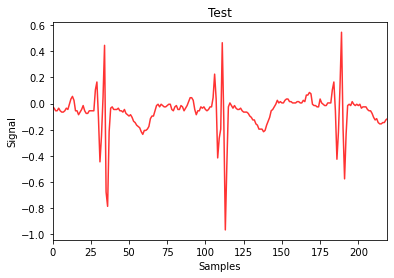

In [14]:
figure()
draw_plot(data, plot_title = 'Test')

/Users/christopherkindl/working/nlp-dissertation/06_time_series_analysis/wrappers.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p,residuals,rank,s) = lstsq(A,y)


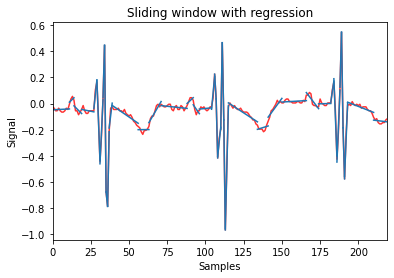

In [6]:
figure()
segments = segment.slidingwindowsegment(data, fit.regression, fit.sumsquared_error, max_error)
draw_plot(data,"Sliding window with regression")
draw_segments(segments)

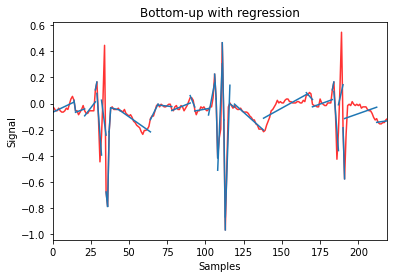

In [7]:
figure()
segments = segment.bottomupsegment(data, fit.regression, fit.sumsquared_error, max_error)
draw_plot(data,"Bottom-up with regression")
draw_segments(segments)

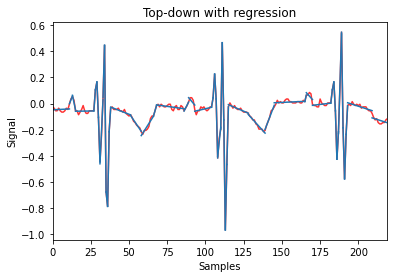

In [8]:
#top-down with regression
figure()
segments = segment.topdownsegment(data, fit.regression, fit.sumsquared_error, max_error)
draw_plot(data,"Top-down with regression")
draw_segments(segments)

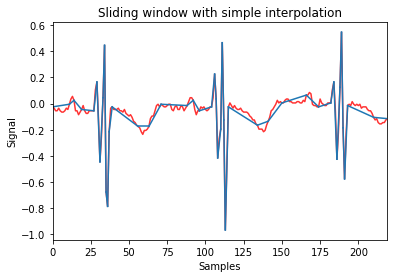

In [9]:
#sliding window with simple interpolation
figure()
segments = segment.slidingwindowsegment(data, fit.interpolate, fit.sumsquared_error, max_error)
draw_plot(data,"Sliding window with simple interpolation")
draw_segments(segments)

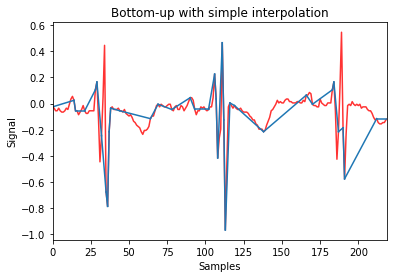

In [10]:
#bottom-up with  simple interpolation
figure()
segments = segment.bottomupsegment(data, fit.interpolate, fit.sumsquared_error, max_error)
draw_plot(data,"Bottom-up with simple interpolation")
draw_segments(segments)

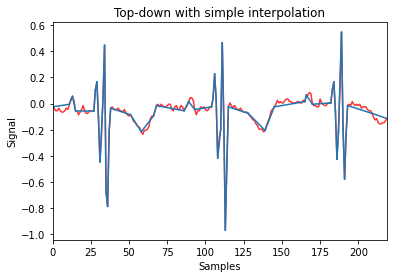

In [11]:
#top-down with  simple interpolation
figure()
segments = segment.topdownsegment(data, fit.interpolate, fit.sumsquared_error, max_error)
draw_plot(data,"Top-down with simple interpolation")
draw_segments(segments)

In [17]:
segments = segment.bottomupsegment(data, fit.interpolate, fit.sumsquared_error, max_error)

In [46]:
x0, y0, x1, y1 = 0, -0.025, 14, 0.025

In [52]:
# calculate slope between starting and ending point of segment
def slope(x0, y0, x1, y1):
    '''
    1. Input coordinates of starting and endpoint of segment.
    2. Return slope between these two points.
    '''
    cathete_a = float(x1 - x0)
    cathete_b = float(y1 - y0)
    slope = round((cathete_b / cathete_a), 4)
    return slope

# calculate duration
def duration(x, y):
    return duration

# calculate variability
def variability(value_range):
    '''
    1. Input value range as array.
    2. Return interquartile range.
    '''
    x = np.array(value_range)
    iqr = round(iqr(x), 4)
    return iqr

In [62]:
x = np.array(data[0:14])
iqr = round(iqr(x), 4)

0.0275

In [69]:
data_copy = data[:]

In [79]:
a = segment.bottomupsegment(data, fit.interpolate, fit.sumsquared_error, max_error)[:]

/Users/christopherkindl/working/nlp-dissertation/06_time_series_analysis/wrappers.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p,residuals,rank,s) = lstsq(A,y)


In [66]:
def duration(series):
    duration_series = []
    for segment in series:
        start, _, end, _ = segment
        length = end-start
        duration_series.append(length)
    return duration_series

In [80]:
def segment_variability(data, segments):
    variability_series = []
    for segment in segments:
        start, _, end, _ = segment
        x = np.array(data[start:end+1])
        segment_iqr = round(iqr(x), 4)
        variability_series.append(segment_iqr)
    return variability_series